# Module 5 - Bayesian analysis - Exercises

## Analysis of a Heart Disease Dataset

In this exercise, your task is to understand factors that differentiate the presence of a heart disease from absence of heart disease.

The goal is for you to find any any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health, using both a Naive Bayes classifer and a Bayesian network




In [81]:
# Numerical Data Manipulation libraries
import pandas as pd
import numpy as np
import statistics as stat

# Figure Plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set()

import scikitplot as skplt

# Naive Bayes libraries
import sklearn
from sklearn.naive_bayes import BernoulliNB      # Naive Bayes Classifier based on a Bernoulli Distribution
from sklearn.naive_bayes import GaussianNB       # Naive Bayes Classifier based on a Gaussian Distribution
from sklearn.naive_bayes import MultinomialNB    # Naive Bayes Classifier based on a Multinomial Distribution

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve

# Text Analysis libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Bayesian Networks libraries
import pyAgrum as bn_graphs
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.lib.bn2roc import showROC


In [2]:
# some useful auxiliary functions

# this is a very helpful function to discretise continous data
# Bayesian networks only support discrete values, they are not able to deal with continuous variables
# given a dataset that has continous variables, we need to discretise them
def discretize_dataframe( df, num_bins, class_var ):
    r=np.array(range(num_bins+1))/(1.0*num_bins)
  
    # quantiles are building using pandas.qcut
    # The "class" column is just copied.
    l=[]
    
    for col in df.columns.values:
        
        if col!=class_var:
            l.append( pd.DataFrame( pd.qcut( df[col],r, duplicates='drop',precision=2),columns=[col]))
        else:
            l.append( pd.DataFrame( np.round(df[col],2),columns=[col]))
    
    treated=pd.concat(l, join='outer', axis=1)
    return treated


### The dataset

Feature information 

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 0 = no heart disease; 1 = heart disease

In [3]:
# path to dataset
path = "data/heart.csv"

# variable we want to predict
class_var = "target"

# load dataset
data = pd.read_csv(path)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [177]:
# how many features and how many datapoints does this dataset have?
num_rows = len(data)
num_columns = len(data.columns)
print("There are a total of %d data records with %d features\n" %(num_rows,num_columns))

# what are the features in this dataset?
feature_names = data.columns.tolist()[:-1]
print(feature_names)

# what are the different heart diseases that we have in this dataset?
labels = data['target']
print(labels)

There are a total of 303 data records with 14 features

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [178]:
# check the distribution of the different heart diseases in the dataset
data.groupby("target").count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,138,138,138,138,138,138,138,138,138,138,138,138,138
1,165,165,165,165,165,165,165,165,165,165,165,165,165


### Predicting heart disease using Naive Bayes

In this exercise, you are expected to apply the Naive Bayes classifier to predict if a person has a heart disease or not


In [192]:
# STEP 1: create the training set and the test set
X_train, X_test, y_train, y_test = train_test_split(data[feature_names], data['target'], test_size=0.3)

# STEP 2: specify the learning algorithm
model = model_base = GaussianNB()

# STEP 3: fit the training data to model
model.fit(X_train, y_train)

# STEP 4: make predictions on test set
y_prediction = model.predict(X_test)

# STEP 5: Measure the accuracy of the model
#accuracy = accuracy_score( y_test, y_prediction )*100
#precision = precision_score(y_test, y_prediction)*100
#recall = recall_score(y_test, y_prediction)*100

#print( 'The overall accuracy of the model is %.2f%%' %(accuracy))
#print( 'The overall precision of the model is %.2f%%' %(precision))
#print( 'The overall recall of the model is %.2f%%' %(recall))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

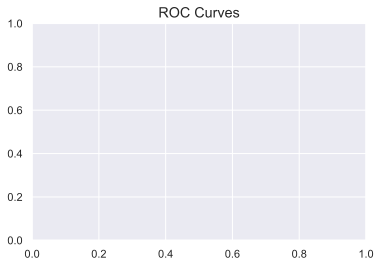

In [193]:
skplt.metrics.plot_roc(y_test, y_prediction)

In [194]:
trials = 500

accuracy = []
precision = []
recall = []
for trial in range( 0, trials ):
    
    # randomly select a test set and a training set
    X_train, X_test, y_train, y_test = train_test_split(data[feature_names], data['target'], test_size=0.3)
    y_expected = y_test
    
    GaussNB = GaussianNB()         # create the Gaussian Naive Bayes Classifer
    GaussNB.fit(X_train, y_train)  # fit the model to the training data


    y_predicted = GaussNB.predict(X_test)                       # get predictions of model on the test set
    accuracy.append(accuracy_score( y_expected, y_predicted )*100)  # save accuracy obtained in each trial
    precision.append(precision_score(y_test, y_prediction)*100)
    recall.append(recall_score(y_test, y_prediction)*100)

In [195]:
# Computute overall average accuracy over the 500 trials
min_accuracy = np.min(accuracy)
max_accuracy = np.max(accuracy)
avg_accuracy = np.mean( accuracy )

min_precision = np.min(precision)
max_precision = np.max(precision)
avg_precision = np.mean(precision)

min_recall = np.min(recall)
max_recall = np.max(recall)
avg_recall = np.mean( recall )

print("Accuracy range from [%.2f, %.2f]" %(min_accuracy, max_accuracy))
print( "Average model accuracy is %.2f" %avg_accuracy  )

print("Precision range from [%.2f, %.2f]" %(min_precision, max_precision))
print( "Average model precision is %.2f" %avg_precision  )

print("Recall range from [%.2f, %.2f]" %(min_recall, max_recall))
print( "Average model recall is %.2f" %avg_recall  )

Accuracy range from [69.23, 94.51]
Average model accuracy is 81.69
Precision range from [33.96, 71.70]
Average model precision is 54.31
Recall range from [46.30, 74.47]
Average model recall is 58.14


In [214]:
trials = 500

y_pred_list = []
for trial in range( 0, trials ):
    
    # randomly select a test set and a training set
    X_train, X_test, y_train, y_test = train_test_split(data[feature_names], data['target'], test_size=0.3)
    y_expected = y_test
    
    GaussNB = GaussianNB()         # create the Gaussian Naive Bayes Classifer
    GaussNB.fit(X_train, y_train)  # fit the model to the training data


    y_predicted = GaussNB.predict_proba(X_test)                       # get predictions of model on the test set
    y_pred_list.append(y_predicted)

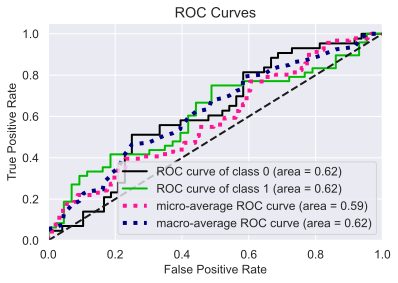

In [216]:
skplt.metrics.plot_roc(y_test, np.average(y_pred_list, axis=0))
plt.savefig('ROC.png')

In [212]:
np.average(y_pred_list, axis=0)

array([[0.46342131, 0.53657869],
       [0.4607469 , 0.5392531 ],
       [0.4439948 , 0.5560052 ],
       [0.46345905, 0.53654095],
       [0.46277828, 0.53722172],
       [0.47478312, 0.52521688],
       [0.44122942, 0.55877058],
       [0.42900673, 0.57099327],
       [0.43596353, 0.56403647],
       [0.4422972 , 0.5577028 ],
       [0.46657118, 0.53342882],
       [0.43550993, 0.56449007],
       [0.44579777, 0.55420223],
       [0.48013452, 0.51986548],
       [0.47602193, 0.52397807],
       [0.47237523, 0.52762477],
       [0.45817403, 0.54182597],
       [0.45992487, 0.54007513],
       [0.43878203, 0.56121797],
       [0.4414726 , 0.5585274 ],
       [0.42630716, 0.57369284],
       [0.45543709, 0.54456291],
       [0.45360324, 0.54639676],
       [0.4459866 , 0.5540134 ],
       [0.4641106 , 0.5358894 ],
       [0.45386725, 0.54613275],
       [0.45674997, 0.54325003],
       [0.42591595, 0.57408405],
       [0.45795346, 0.54204654],
       [0.4403973 , 0.5596027 ],
       [0.

In [210]:
np.average(y_pred_list, axis=0)

array([0.556, 0.542, 0.53 , 0.536, 0.552, 0.572, 0.56 , 0.544, 0.578,
       0.558, 0.606, 0.538, 0.6  , 0.57 , 0.534, 0.564, 0.554, 0.568,
       0.54 , 0.526, 0.542, 0.584, 0.532, 0.558, 0.556, 0.58 , 0.538,
       0.594, 0.584, 0.562, 0.578, 0.542, 0.552, 0.548, 0.54 , 0.556,
       0.572, 0.536, 0.576, 0.56 , 0.562, 0.61 , 0.612, 0.54 , 0.56 ,
       0.546, 0.584, 0.58 , 0.53 , 0.538, 0.56 , 0.554, 0.544, 0.57 ,
       0.546, 0.61 , 0.622, 0.564, 0.59 , 0.568, 0.514, 0.532, 0.542,
       0.536, 0.546, 0.582, 0.576, 0.566, 0.562, 0.556, 0.558, 0.586,
       0.556, 0.606, 0.544, 0.532, 0.604, 0.562, 0.558, 0.542, 0.566,
       0.532, 0.54 , 0.552, 0.57 , 0.568, 0.548, 0.62 , 0.59 , 0.6  ,
       0.548])

### Analyse the data using a Bayesian network

In [77]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [78]:
# STEP 1: separate the dataset into conitnuous variables and discrete variables

continuous_var_df = data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

discrete_var_df = data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]

# STEP 2: discretise the continuous variable data using 4 bins
discretized_df = discretize_dataframe(continuous_var_df, 3, 'token')

# STEP 3: join the discrete_var_df with the discretized_df into a single dataframe
processed_df = pd.concat([discrete_var_df, discretized_df], join='outer', axis=1)

heartfile = 'data/processedheart.csv'
processed_df.to_csv(heartfile, index=False)

# STEP 4: Learn a Bayesian network from the processed_df
# call a BN learner
learner = gum.BNLearner(heartfile)
# specify the learning algorithm. For the purposes of this unit, one can use the Hill Climbing algorithm
learner.useGreedyHillClimbing()
# learn the data
bn = learner.learnBN()
bn

# STEP 5: Analyse the BN by observing different variables and checking their impact in the target variable





(gum::BayesNet<double>@000001EDB95CC0C0) BN{nodes: 14, arcs: 10, domainSize: 10^6.44706, dim: 97}

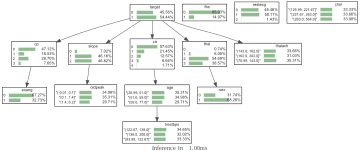

In [79]:
inference = bn_graphs.LazyPropagation(bn)

gnb.showInference(bn,inference)